## EDA para analisis de incidentes del Editor Geografico

##### Para la exploración de estos datos se llevo que se puede dividir en tres partes:
* Preprocesamiento básico de datos de texto
* Limpieza de los datos de texto
* Preparación de datos para el análisis de datos exploratorios (EDA)
* Análisis exploratorio de datos en reportes del editor geografico usando Python

In [67]:
import numpy as np
import pandas as pd
import re
import string
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textwrap import wrap
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

#### Preprocesamiento básico de datos de texto
Para el preporcesamiento e datos e texto se debe eliminar valores nulos de nuestro dataframe para que la medición tenga paramentros mas limpios
para su procesamiento.Ademas se añade la codificación "latin-1" para el procesamiento de este tipo de texto. Igualmente se hace un paso adicional 
en excel antes de la extracción del dataframe para eliminar todos los signos de puntuacióny cartacteres que no se interpretan en dataframe de pandas
como  lo son: (á,é,í,ó,ú,ñ)

In [3]:
df = pd.read_csv('Editor3.csv', sep=';',encoding='latin-1')
del df["Data1"]
del df["Data2"]
print(df.isnull().sum())
df.dropna(inplace=True)
print(df.isnull().sum())

Data3    723
dtype: int64
Data3    0
dtype: int64
Review 1:
 oficina de tecnologia de la informacion y comunicaciones
Review 2:
 direccion territorial cauca
Review 3:
 218 048	editor presenta algunas inconsistencias 218048	igac  direcciones territoriales  casanare	resueltas	requerimiento	leidy alarcon chavita 5818	daniel rico bonilla 3933	7062022 1200	7062022 1510	12062022 000	7062022 1510		5software  snc  editor  sin ts	territorial casanare			cordial saludo
Review 4:
 solicito su colaboracion en verificar editor geografico ya que cuando se esta trabajando 
Review 5:
 se minimiza la pantalla del editor y no permite seguir trabajando


#### Limpieza de los datos de texto
Ahora vamos a limipiar el texto, en general los datos de texto contienen mucho ruido que puede afectar negativamente el procesamiento como lo pueden ser
los caracteres como los signos de puntuación que son utiles para nuestro entendimiento del lengauje pero que afectan negativamente el procesamiento de estos datos, mediante el uso de funciones lambda se convierten todas a minusculas string.punctuations contiene todas esta puntutaciones que queremos eliminar.


In [ ]:
df['cleaned']=df['Data3'].apply(lambda x: x.lower())
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

for index,text in enumerate(df['cleaned'][35:40]):
  print('Review %d:\n'%(index+1),text)

#### Preparación de datos para el análisis de datos exploratorios (EDA)

Ahora un paso antes para empezar con EDA se debe hacer algo mas, existen palabaras "vacias" en el lenguaje que de por si nos ayudan a su entendimientono 
significan nada para el procesamiento de datos, en algunas ocasiones se debe pensar esto bien ya que para algunos tipos de datos si pueden ser de ayuda y
no deben de ser desechados 

La lematización es un proceso sistemático de reducción de un token a su lema. Utiliza vocabulario, estructura de palabras, etiquetas de partes del discurso y relaciones gramaticales para convertir una palabra a su forma base.COn estos se preocede a usar un modelo de lematización precente en spacy para el lenguaje en español llamado "es_core_news_sm"


In [6]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\t',' ', x))

nlp = spacy.load('es_core_news_sm',disable=['parser', 'ner'])

df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
df_grouped=df['lemmatized']
print(df_grouped)
df_grouped.head()

0       id titulo entidad tipo solicitante   solicitan...
1                                                        
2       218 082 error numero predial construccion 2180...
3       radicado 1800100003962022 enviar modificar inf...
4                                           quedo atentar
                              ...                        
7698    116 841 actualizacion javo 116841 igac   sede ...
7699    111 859 activar usuario 111859 igac   sede cen...
7701                                         cordialmente
7703                              orlar bustamante mendez
7705                   coordinador git   comercializacion
Name: lemmatized, Length: 6984, dtype: object


0    id titulo entidad tipo solicitante   solicitan...
1                                                     
2    218 082 error numero predial construccion 2180...
3    radicado 1800100003962022 enviar modificar inf...
4                                        quedo atentar
Name: lemmatized, dtype: object

#### Análisis exploratorio de datos(wordcloud)
Como se dijo anteriormente puede ser o no beneficioso usar la lematización ya que nos puede mostrar datos que nos ocultarian un dataframe "Limpio" para ello
se propone hacer un grafico con cada uno de estos dos elementos para poder identificar mas a fondo como es el comportamiento del editor en un nivel mas general.
Aun asi hay que hacer mucha depuración de ruido manualmente para que se muestre en pantalla los verdaderos datos que nos dicen algo sobre el texto.


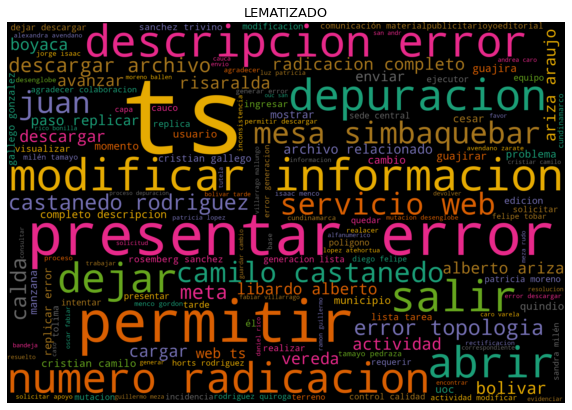

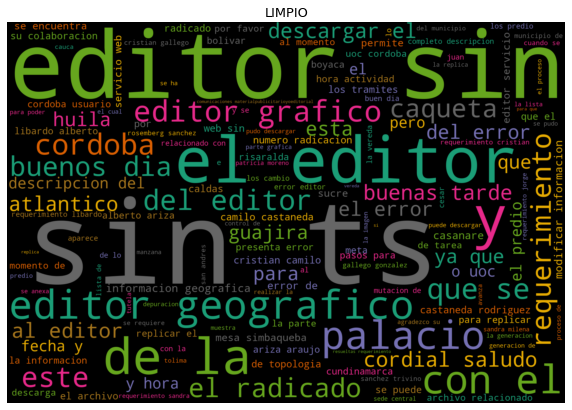

In [47]:
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped)

text = " ".join(review for review in df.lemmatized.astype(str))
text2 = " ".join(review for review in df.cleaned.astype(str))


stopwords = set(STOPWORDS)
stopwords.update(["alexander", "5software", "territorial", "igac", "snc","luis", 'fernando',
                  "direccion", "dirección","territoriales","direcciones","cerrado",'editor',
                  'sierra','carlos','barrio','cordoba','cordial','saludo','grafico','palacio'
                  'atlantico','huila','casanare','caqueta','predio','requerimiento','t','geografico',
                  'aparecer','atlantico','radicado','tramite','palacio','sucre','gracia','tramit','fecha','hora'])
stopword2 = set(STOPWORDS)
stopword2.update(["alexander", "5software", "territorial", "igac", "snc","luis", 'fernando',
                   "direccion", "dirección","territoriales","direcciones","cerrado",'en','el'
                   'la','barrio','tramite','carlos','sierra','barrios'])

#wordcloud = WordCloud(stopwords=stopwords,width=2200, height=1500,max_words=150,colormap="Dark2").generate(text)
#wordcloud2 = WordCloud(stopwords=stopwords,width=2200, height=1500,max_words=150,colormap="Dark2").generate(text2)
#wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
def generate_wordcloud(data,title,stop_words):
    wordcloud2 = WordCloud(stopwords=stop_words,width=2200, height=1500,max_words=150,colormap="Dark2").generate(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud2, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.show()


title = "LEMATIZADO"
title2 = "LIMPIO"
generate_wordcloud(text,title,stopwords)
generate_wordcloud(text2,title2,stopword2)



Como se puede observar el diagrama lematizado nos ofrece datos muy valiosos sobre el editor como lo es por ejemplo "presenta error","modificar información","descargar archivo","error topologia" ,"ts"
Para el digrama "Limpio" se tiene una información muy en concreto, el patrón arroja "editor sin ts" mas adelante se analizara que significa esto.
Pero con esto se tiene una ide a muy importante sobre lo que esta pasando con el editor, pues esta presentando ciertos errores y con ello los usuarios solicitan su revisión.

No se puede sacar otro tipo de analisis como el sentimental ya que por la naturaleza del texto, todos van a tener una polaridad negativa o la misma polaridad por
lo que este tipo de analisis no nos mostraria nada util, por ello se opta por un segundo analisis mediante la libreria pyLDAvis.

pyLDAvis está diseñado para ayudar a los usuarios a interpretar los temas en un modelo de tema que se ha ajustado a un corpus de datos de texto. El paquete extrae información de un modelo de tema LDA ajustado para informar una visualización interactiva basada en la web, de esta forma podemos visualizar algunos 
topicos (temas) que son utiles para nuestro EDA.

In [78]:
dtm_tf = cv.fit_transform(df['cleaned'].values.astype('U'))   #docs_raw)
tfidf_vectorizer = TfidfVectorizer(**cv.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(df['cleaned'].values.astype('U')) 
lda_tf = LatentDirichletAllocation(n_components=8, random_state=0)    #n_components = can depend
lda_tf.fit(dtm_tf)
lda_tfidf = LatentDirichletAllocation(n_components=8, random_state=0)
lda_tfidf.fit(dtm_tfidf)


c:\Program Files\Python39\lib\site-packages\sklearn\feature_extraction\text.py:2018: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn(


LatentDirichletAllocation(n_components=8, random_state=0)

In [76]:
dtm_tf1 = cv.fit_transform(df['lemmatized'].values.astype('U'))   #docs_raw)
tfidf_vectorizer = TfidfVectorizer(**cv.get_params())
dtm_tfidf1 = tfidf_vectorizer.fit_transform(df['lemmatized'].values.astype('U')) 
lda_tf1 = LatentDirichletAllocation(n_components=8, random_state=0)    #n_components = can depend
lda_tf1.fit(dtm_tf)
lda_tfidf1 = LatentDirichletAllocation(n_components=8, random_state=0)
lda_tfidf1.fit(dtm_tfidf1)

c:\Program Files\Python39\lib\site-packages\sklearn\feature_extraction\text.py:2018: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn(


LatentDirichletAllocation(n_components=8, random_state=0)

In [73]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, cv)

c:\Program Files\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SoporteTI\AppData\Roaming\Python\Python39\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.141753 -0.141246       1        1  50.729492
1     -0.298534 -0.079784       2        1  20.227537
4      0.097772 -0.134874       3        1  15.419917
3     -0.033386  0.186776       4        1   6.922784
2      0.092395  0.169128       5        1   6.700269, topic_info=             Term         Freq        Total Category  logprob  loglift
9514  territorial  3210.000000  3210.000000  Default  30.0000  30.0000
9571      tramite  1510.000000  1510.000000  Default  29.0000  29.0000
7900         igac  1610.000000  1610.000000  Default  28.0000  28.0000
9651      usuario   305.000000   305.000000  Default  27.0000  27.0000
9602           ts  1684.000000  1684.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
9472        tarde    35.745488   180.482283   Topic5  -5.2004   1.0838
6758      cerrado    47.464276  1472.743391   Topic5  -4.9169  -0.7319
7918       imagen    28.683159   142.624160   Topic5  -5.4205   1.0991
9153    rodriguez    29.816649   195.961090   Topic5  -5.3818   0.8202
9602           ts    26.226171  1684.019594   Topic5  -5.5101  -1.4592

[332 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
122       1  0.986645       042
354       1  0.995521  10052022
471       1  0.972849   1102019
506       3  0.967712   1112019
525       1  0.217664   1122021
...     ...       ...       ...
9814      4  0.838568      zona
9823      1  0.057029        él
9823      2  0.829511        él
9823      3  0.103689        él
9823      5  0.010369        él

[507 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 5, 4, 3])

In [77]:
pyLDAvis.sklearn.prepare(lda_tf1, dtm_tf1, cv)

C:\Users\SoporteTI\AppData\Roaming\Python\Python39\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.172030 -0.088897       1        1  29.911303
6     -0.194877 -0.073358       2        1  23.926115
4     -0.164023 -0.052202       3        1  10.356731
1      0.238071 -0.024635       4        1   8.677596
7      0.240434 -0.046389       5        1   8.367169
5      0.211966 -0.024029       6        1   7.592552
3     -0.106720 -0.005737       7        1   6.617934
2     -0.052821  0.315247       8        1   4.550600, topic_info=             Term         Freq        Total Category  logprob  loglift
9571      tramite  1486.000000  1486.000000  Default  30.0000  30.0000
9514  territorial  3201.000000  3201.000000  Default  29.0000  29.0000
7479        error   770.000000   770.000000  Default  28.0000  28.0000
7165    descargar   449.000000   449.000000  Default  27.0000  27.0000
9602           ts  1687.000000  1687.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
9472        tarde    34.828514   178.786555   Topic8  -4.8395   1.4542
7724      gestion    21.674725    41.989073   Topic8  -5.3138   2.4286
5187    5software    58.935878  1573.915704   Topic8  -4.3135  -0.1950
6758      cerrado    37.580589  1470.355437   Topic8  -4.7635  -0.5769
6242     adjuntar    19.314139    64.368266   Topic8  -5.4291   1.8861

[518 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
122       1  0.971401       042
122       7  0.019047       042
346       3  0.892166  10032022
346       4  0.089217  10032022
379       1  0.990814  10122021
...     ...       ...       ...
9823      2  0.100000        él
9823      3  0.021053        él
9823      4  0.115789        él
9823      5  0.410524        él
9823      6  0.284209        él

[921 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 7, 5, 2, 8, 6, 4, 3])

Como es de notar pyLDAvis nos dio casi que la mismo conclusion que wordcloud solo que mas aterrizada, lo que siginifca este grafico es que en 8 temas se puede contextualizar el texto y la distancio con cada uno de estos es la relacion que se tienen entren ellos, es verdad que se pueden usar mas temas sin embargo se da la precision exacta con 8, el parametro λ es el peso de LDA se usa bajo para buscar palabras exclusivas de un texto en particular y alto para palabras comunes en un texto en particualar, en este caso lo usaremos alto.


In [75]:
for i,topic in enumerate(lda_tf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['luis', 'cerrado', 'dirección', 'requerimiento', 'igac', '5software', 'ts', 'snc', 'editor', 'territorial']


Top 10 words for topic #1:
['descargar', 'informacion', 'solicitar', 'radicado', 'geografico', 'grafico', 'predio', 'error', 'editor', 'tramite']


Top 10 words for topic #2:


c:\Program Files\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['sede', 'central', 'anexar', 'anexo', 'jorge', 'comunicación', '5software', 'sucre', 'igac', 'requerimiento']


Top 10 words for topic #3:
['snc', 'gracias', 'andrea', 'tolima', 'colaboracion', 'agradecer', 'gracia', 'fecha', 'hora', 'usuario']


Top 10 words for topic #4:
['carlos', '5software', 'dirección', 'snc', 'requerimiento', 'cerrado', 'igac', 'ts', 'territorial', 'editor']




### Conclusiones 
* Se presentan multiples errores en el editor con lo que los usuarios piden que se revisen para su correcto funcionamiento.
* Como es de notar lo errores mas comunes son "modificar información","descargar archivo","error topologia" ,"ts" informados por la wordcloud, sin embargo para cada pydyvis se pueden corroborar algunos como el casi de pyLDAvis para el dataframe "Limpio" en donde se puede observar que la informacion mas relevane en el topico 2 da al descargar en el editor geografico un error, y para pyLDAvis con el dataframe lematizado muestra un conjunto de temas en relación (1,2,3,7) que nos dicen que ademas de que existen un problema con descargar en el editor no sigue apareciendo el paramentro ts.sin embargo no se debe descargar los otros errores mostrados en wordcloud
* Un editor sin ts: como se vio anteriormente esto es algo que es muy comun en el texto, un ts en el ambito geografico se usa para el procesamiento de datos de series temporales hidrológicas, hidrogeológicas y meteorológicas ademas el programa generalmente está diseñado para trabajar con conjuntos de datos de series temporales. Es posible que este ausente este software en el editor.